In [11]:
import numpy as np
import matplotlib.pyplot as plt

import limpy.lcp as ll

In [12]:
# Plot SFR with halomass in redshift range 0 to 8. 
# You can files using "read_sfr" function. or you can use inbuild "plot_sfr_mhalo" directly
# you may need to change the plotting parameters such as xlim, ylim, color etc....

In [13]:
log_mhalo=11  # halo mass in log scale, units are in M_sun
ll.mhalo_to_sfr(log_mhalo)

(array([ 1.25383949e+01,  1.08458149e+01,  9.59816016e+00,  8.63381856e+00,
         7.86218417e+00,  7.22821785e+00,  6.69627423e+00,  6.24249316e+00,
         5.84987807e+00,  5.50622320e+00,  5.20243508e+00,  4.93158510e+00,
         4.68828214e+00,  4.46830570e+00,  4.26820428e+00,  4.08530601e+00,
         3.91731534e+00,  3.76235832e+00,  3.61891631e+00,  3.48563252e+00,
         3.36142235e+00,  3.24531105e+00,  3.13648754e+00,  3.03424265e+00,
         2.93793810e+00,  2.84707122e+00,  2.76112352e+00,  2.67969032e+00,
         2.60239631e+00,  2.52891772e+00,  2.45895090e+00,  2.39223382e+00,
         2.32852916e+00,  2.26761079e+00,  2.20929412e+00,  2.15340031e+00,
         2.09977558e+00,  2.04826005e+00,  1.99872554e+00,  1.95105382e+00,
         1.90513570e+00,  1.86085379e+00,  1.81812392e+00,  1.77685987e+00,
         1.73697406e+00,  1.69839985e+00,  1.66105362e+00,  1.62488549e+00,
         1.58983490e+00,  1.55583869e+00,  1.52284436e+00,  1.49080271e+00,
         1.4

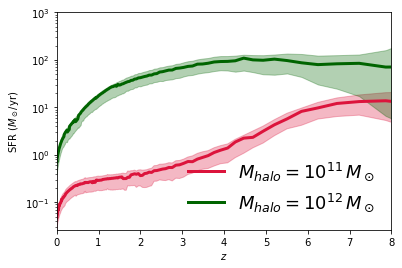

In [14]:
#plot
log_mhalo=[11,12]
ll.plot_sfr_mhalo(log_mhalo,colorlist=None,figname=None)

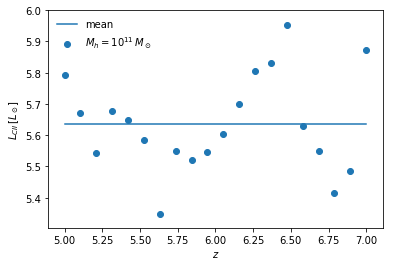

In [15]:
# plot luminosity of CII line at z=6 for the halo mass 1e11. 
# PLEASE NOTE that the result will change if you run the 
#same code again as we have used the scattered relation between SFR and CII luminosity
z=np.linspace(5,7,num=20)
mh=11
lc2=ll.mhalo_to_lcp(z,mh)
plt.scatter(z,lc2,label=r"$M_{h}=10^{11}\, M_\odot$")
plt.plot(z, np.mean(lc2)*np.ones(len(z)),label="mean")

plt.xlabel("$z$")
plt.ylabel(r"$L_{CII}\,[L_\odot]$")
plt.legend(loc=0,frameon=False)

Text(0,0.5,'$\\log(L_{CII})\\,\\,[L_\\odot]$')

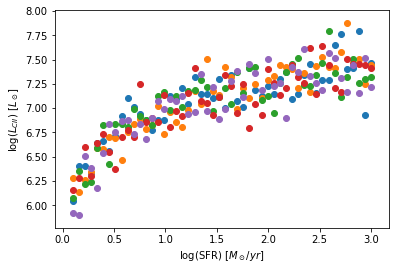

In [16]:
# Make same plot for 5 times at z=6, for different star formation rate to check the Gaussian scatter in L_{CII}
z=7 #redshift
sfr=np.linspace(0.1,3,num=50) #SFR rate
num_of_iteration=5 

for i in range(num_of_iteration):
    lc2=ll.sfr_to_lcp_scatter(z, sfr)
    
    #scatter lc2 points
    plt.scatter(sfr,lc2)
    
plt.xlabel(r"$\log(\mathrm{SFR})\,\,[M_\odot/yr]$")
plt.ylabel(r"$\log(L_{CII})\,\,[L_\odot]$")
#plt.ylim(4.0,9)



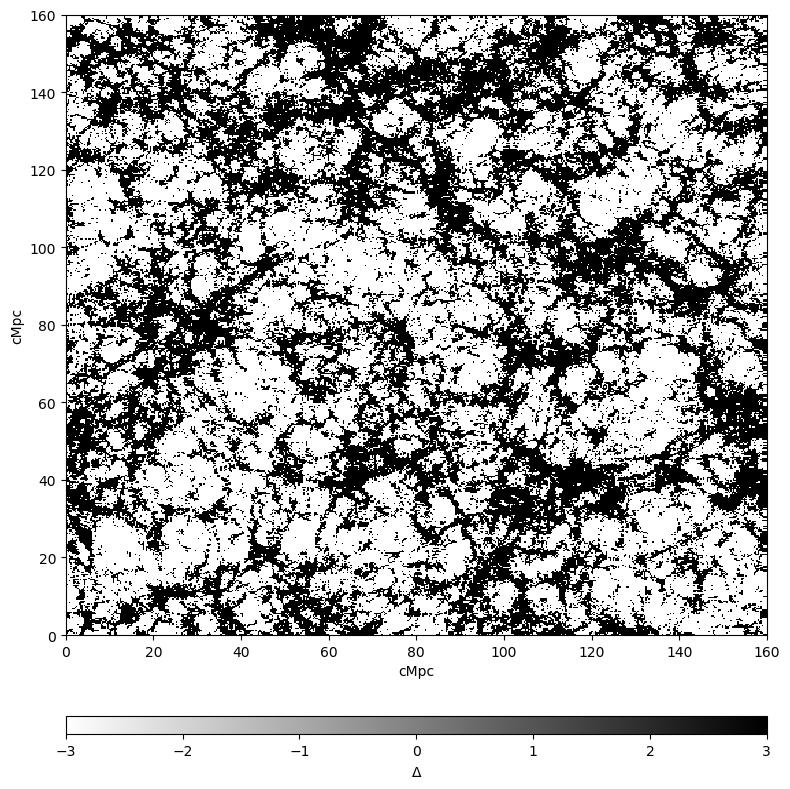

In [17]:
"""
plot_slice module can make slice plots for density, halos and also it 
can over-plot the haloes on the dark matter distribution. 

This function takes few inputs as described below. 

#TODO: I'll make it more user friendly. 

"""

boxsize=160  # Size of the box in comoving Mpc (cMpc)
ngrid= 512  # number of grids along the box axis
nproj=10    # no of cells to project
z_halos=7.02 # redshift of halos, (Note: at this point it is not used in the function)


#It can read halos and density only from the redshift information but now, lets just do it for one redshift 
# by manually providng the files

#location of density file
dens_file='/Users/anirbanroy/Documents/line-intensity/updated_smoothed_deltax_z007.02_512_160Mpc' 

#location of halo catalogue file
halocat_file='/Users/anirbanroy/Documents/line-intensity/halos_z7.02_2048_160Mpc'


#plot only the density slice, so, make density_plot=True and halo_plot=False (unless you 
#do not want to overplot the halos)
ll.plot_slice(boxsize, ngrid, nproj, dens_file, halocat_file,z_halos,halo_cutoff_mass_log=9, halo_plot=False,
               density_plot=True)